In [1]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot 
import random
import sounddevice as sd
import soundfile as sf


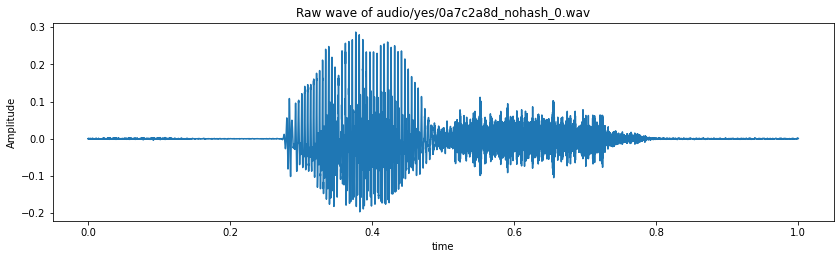

In [2]:
train_audio_path = 'audio/'
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [3]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [4]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'start', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', '_background_noise_']


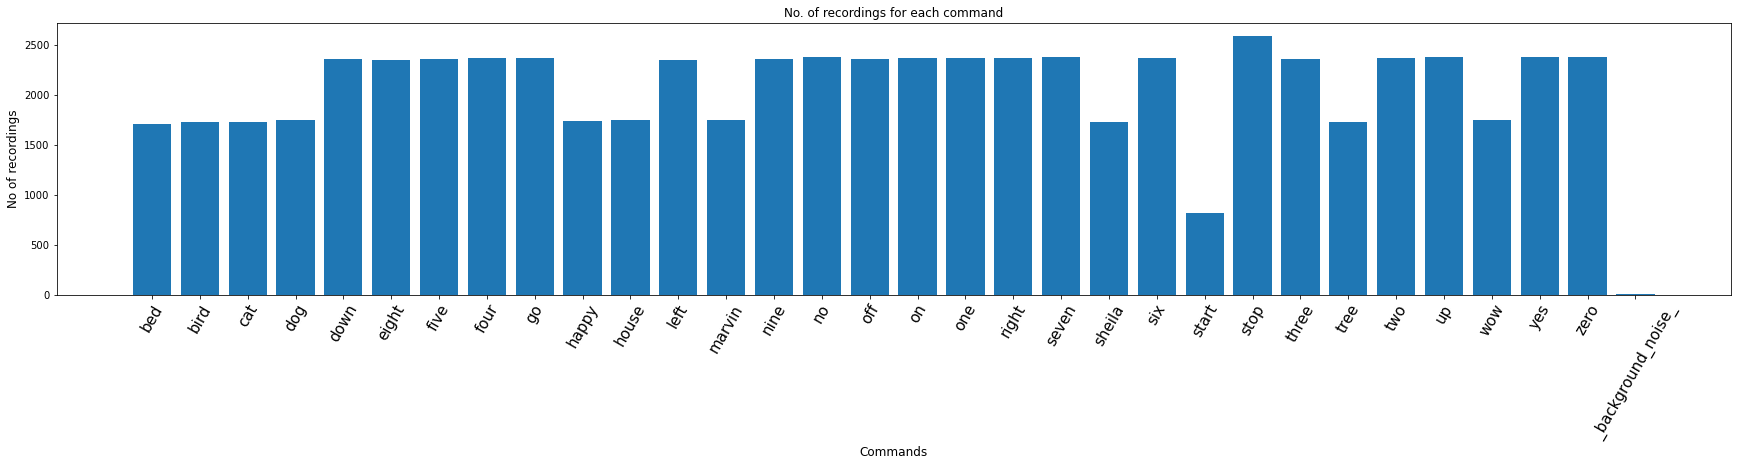

In [5]:
labels=os.listdir(train_audio_path)
print(labels)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'start', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']

bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
start
stop
three
tree
two
up
wow
yes
zero


(array([1.0400e+02, 2.7900e+02, 5.3100e+02, 1.0340e+03, 1.6810e+03,
        2.5650e+03, 5.9529e+04, 1.8000e+01, 0.0000e+00, 4.0000e+00]),
 array([0.336 , 0.4368, 0.5376, 0.6384, 0.7392, 0.84  , 0.9408, 1.0416,
        1.1424, 1.2432, 1.344 ]),
 <a list of 10 Patch objects>)

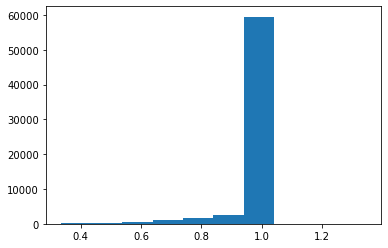

In [6]:
duration_of_recordings=[]
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [7]:
train_audio_path = 'audio/'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
start
stop
three
tree
two
up
wow
yes
zero


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [9]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [10]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [11]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [12]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)


model = Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)          

(array([1.0400e+02, 2.7900e+02, 5.3100e+02, 1.0340e+03, 1.6810e+03,
        2.5650e+03, 5.9529e+04, 1.8000e+01, 0.0000e+00, 4.0000e+00]),
 array([0.336 , 0.4368, 0.5376, 0.6384, 0.7392, 0.84  , 0.9408, 1.0416,
        1.1424, 1.2432, 1.344 ]),
 <a list of 10 Patch objects>)

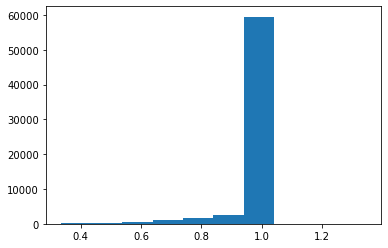

In [13]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model50.hdf5', monitor='val_acc', verbose=1, mode='max')

In [84]:
history=model.fit(x_tr, y_tr ,epochs=50, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/50
1457/1457 [==============================] - ETA: 0s - loss: 2.9460 - accuracy: 0.1258
Epoch 00001: saving model to best_model50.hdf5
1457/1457 [==============================] - 297s 204ms/step - loss: 2.9460 - accuracy: 0.1258 - val_loss: 2.2323 - val_accuracy: 0.3212
Epoch 2/50
1457/1457 [==============================] - ETA: 0s - loss: 2.1526 - accuracy: 0.3203
Epoch 00002: saving model to best_model50.hdf5
1457/1457 [==============================] - 294s 202ms/step - loss: 2.1526 - accuracy: 0.3203 - val_loss: 1.7485 - val_accuracy: 0.4574
Epoch 3/50
1457/1457 [==============================] - ETA: 0s - loss: 1.7848 - accuracy: 0.4394
Epoch 00003: saving model to best_model50.hdf5
1457/1457 [==============================] - 291s 200ms/step - loss: 1.7848 - accuracy: 0.4394 - val_loss: 1.4282 - val_accuracy: 0.5720
Epoch 4/50
1457/1457 [==============================] - ETA: 0s - loss: 1.5081 - accuracy: 0.5272
Epoch 00004: saving model to best_model50.hdf5
1457/1457

Epoch 30/50
1457/1457 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.7846
Epoch 00030: saving model to best_model50.hdf5
1457/1457 [==============================] - 291s 200ms/step - loss: 0.7041 - accuracy: 0.7846 - val_loss: 0.6241 - val_accuracy: 0.8137
Epoch 31/50
1457/1457 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.7873
Epoch 00031: saving model to best_model50.hdf5
1457/1457 [==============================] - 291s 200ms/step - loss: 0.6960 - accuracy: 0.7873 - val_loss: 0.6516 - val_accuracy: 0.8090
Epoch 32/50
1457/1457 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.7886
Epoch 00032: saving model to best_model50.hdf5
1457/1457 [==============================] - 293s 201ms/step - loss: 0.6953 - accuracy: 0.7886 - val_loss: 0.6752 - val_accuracy: 0.7993
Epoch 33/50
1457/1457 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.7911
Epoch 00033: saving model to best_model50.hdf5
1457/

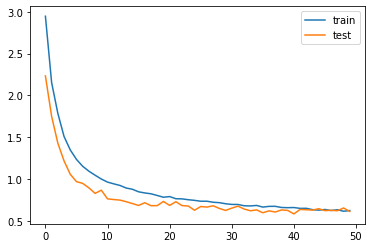

In [85]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [16]:
from keras.models import load_model
model=load_model('best_model50.hdf5')

In [17]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [18]:
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))


Audio: seven
Text: down


In [19]:
samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)


start
end


In [20]:
os.listdir('test/')
filepath='test'

#reading the voice commands
samples, sample_rate = librosa.load(filepath + '/' + 'test.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)  

predict(samples)

'down'

In [21]:
from pydub import AudioSegment

In [22]:
from pydub.silence import split_on_silence

In [23]:
sound_file = AudioSegment.from_wav("1/s.wav")

In [24]:
audio_chunks = split_on_silence(sound_file, min_silence_len=1000, silence_thresh=-40)


In [25]:
from pydub.utils import make_chunks
j=0
for i , chunk in enumerate(audio_chunks):
    out = "test/chunk{0}.wav".format(i)
    print("exporting",out)
    
    chunk_silent = AudioSegment.silent(duration = 600) 
    chunk = chunk+chunk_silent
    chunk.export(out,format="wav",bitrate ='150k')
    j=j+1

exporting test/chunk0.wav
exporting test/chunk1.wav
exporting test/chunk2.wav
exporting test/chunk3.wav
exporting test/chunk4.wav
exporting test/chunk5.wav
exporting test/chunk6.wav
exporting test/chunk7.wav
exporting test/chunk8.wav
exporting test/chunk9.wav
exporting test/chunk10.wav
exporting test/chunk11.wav
exporting test/chunk12.wav
exporting test/chunk13.wav
exporting test/chunk14.wav
exporting test/chunk15.wav
exporting test/chunk16.wav
exporting test/chunk17.wav
exporting test/chunk18.wav


In [26]:
os.listdir('test/')
filepath='test'
text_learn =[]
#reading the voice commands
for i in range(0,j):
    samples, sample_rate = librosa.load(filepath + '/' +'chunk' +str(i)+'.wav', sr = 16000)
    samples = librosa.resample(samples, sample_rate, target_sr=8000)
    ipd.Audio(samples,rate=8000)
    print(predict(samples[0:8000]))
    text_learn.append(predict(samples[0:8000]))
    
       

three
bed
seven
down
down
eight
on
four
go
happy
go
bird
go
go
nine
marvin
seven
three
zero


In [27]:
import speech_recognition as sr

In [28]:
r = sr.Recognizer()

In [29]:
with sr.AudioFile("1/s.wav") as source:
    audio_data = r.record(source)
    txt = r.recognize_google(audio_data)
    print(txt)

bed Baird cat 854k happy lift stop 1730


In [30]:
import math

In [31]:
def get_white_noise(signal,SNR):
    # geting the RMS of the signal
    RMS_s = math.sqrt(np.mean(signal**2))
    # geting the RMS of the noise
    RMS_n = math.sqrt(RMS_s**2/pow(10,SNR/10))
    
    STD_n = RMS_n
    
    noise = np.random.normal(0,STD_n, signal.shape[0])
    return noise

In [32]:
os.listdir('test/')
filepath='test'
noise_text = []
#reading the voice commands
for i in range(0,j):
    samples, sample_rate = librosa.load(filepath + '/' +'chunk' +str(i)+'.wav', sr = 16000)
    samples = librosa.resample(samples, sample_rate, target_sr=8000)
    samples = np.interp(samples, (samples.min(),samples.max()), (-1,1))
    noise = get_white_noise(samples,SNR=10)
    signal_noise= samples+noise
    ipd.Audio(signal_noise,rate=8000)
    print(predict(signal_noise[0:8000]))
    noise_text.append(predict(samples[0:8000]))

nine
six
bed
bed
dog
three
bed
bird
bird
three
three
zero
go
seven
five
one
seven
three
six


In [33]:
textual_original = ['bed','bird','cat','dog','down','eight','five','four','go','happy','house'
                   , 'left','stop','start','right','one','seven','three', 'yes', 'zero']

In [34]:
import nltk

In [35]:
print("Edit distance between original text and audio convertion text= ", nltk.edit_distance(textual_original,text_learn))

Edit distance between original text and audio convertion text=  12


In [36]:
print("Edit distance between original text and Google audio convertion text= ", nltk.edit_distance(textual_original,txt))

Edit distance between original text and Google audio convertion text=  39


In [37]:
print("Edit distance between audio and noisy audio convertion text= ", nltk.edit_distance(text_learn,noise_text))

Edit distance between audio and noisy audio convertion text=  4


In [38]:
print("Edit distance between audio and noisy audio convertion text= ", nltk.edit_distance(textual_original,noise_text))

Edit distance between audio and noisy audio convertion text=  12


In [39]:
for i,j in enumerate(text_learn):
    
        print("Edit Distance beween words ",j,"in original text and ",textual_original[i],"in learned speech is",nltk.edit_distance(textual_original[i],j) )

Edit Distance beween words  three in original text and  bed in learned speech is 4
Edit Distance beween words  bed in original text and  bird in learned speech is 2
Edit Distance beween words  seven in original text and  cat in learned speech is 5
Edit Distance beween words  down in original text and  dog in learned speech is 2
Edit Distance beween words  down in original text and  down in learned speech is 0
Edit Distance beween words  eight in original text and  eight in learned speech is 0
Edit Distance beween words  on in original text and  five in learned speech is 4
Edit Distance beween words  four in original text and  four in learned speech is 0
Edit Distance beween words  go in original text and  go in learned speech is 0
Edit Distance beween words  happy in original text and  happy in learned speech is 0
Edit Distance beween words  go in original text and  house in learned speech is 4
Edit Distance beween words  bird in original text and  left in learned speech is 4
Edit Dist

In [40]:
for i,j in enumerate(noise_text):
    
        print("Edit Distance beween words ",j,"in original text and ",textual_original[i],"in noisy speech is",nltk.edit_distance(textual_original[i],j) )

Edit Distance beween words  tree in original text and  bed in noisy speech is 3
Edit Distance beween words  three in original text and  bird in noisy speech is 4
Edit Distance beween words  seven in original text and  cat in noisy speech is 5
Edit Distance beween words  bed in original text and  dog in noisy speech is 3
Edit Distance beween words  down in original text and  down in noisy speech is 0
Edit Distance beween words  eight in original text and  eight in noisy speech is 0
Edit Distance beween words  on in original text and  five in noisy speech is 4
Edit Distance beween words  four in original text and  four in noisy speech is 0
Edit Distance beween words  go in original text and  go in noisy speech is 0
Edit Distance beween words  happy in original text and  happy in noisy speech is 0
Edit Distance beween words  go in original text and  house in noisy speech is 4
Edit Distance beween words  bird in original text and  left in noisy speech is 4
Edit Distance beween words  go in

In [41]:
for i,j in enumerate(text_learn):
    
        print("Edit Distance beween words ",j,"in learned text and ",noise_text[i],"in noisy speech is",nltk.edit_distance(noise_text[i],j) )

Edit Distance beween words  three in learned text and  tree in noisy speech is 1
Edit Distance beween words  bed in learned text and  three in noisy speech is 4
Edit Distance beween words  seven in learned text and  seven in noisy speech is 0
Edit Distance beween words  down in learned text and  bed in noisy speech is 4
Edit Distance beween words  down in learned text and  down in noisy speech is 0
Edit Distance beween words  eight in learned text and  eight in noisy speech is 0
Edit Distance beween words  on in learned text and  on in noisy speech is 0
Edit Distance beween words  four in learned text and  four in noisy speech is 0
Edit Distance beween words  go in learned text and  go in noisy speech is 0
Edit Distance beween words  happy in learned text and  happy in noisy speech is 0
Edit Distance beween words  go in learned text and  go in noisy speech is 0
Edit Distance beween words  bird in learned text and  bird in noisy speech is 0
Edit Distance beween words  go in learned text

In [42]:
from pyphonetics import Soundex
soundex = Soundex()

In [43]:
for i,j in enumerate(text_learn):
    
        print("The phonetic similarity beween words ",j,"in original text and ",textual_original[i],"in learned speech is",soundex.sounds_like(textual_original[i],j) )

The phonetic similarity beween words  three in original text and  bed in learned speech is False
The phonetic similarity beween words  bed in original text and  bird in learned speech is False
The phonetic similarity beween words  seven in original text and  cat in learned speech is False
The phonetic similarity beween words  down in original text and  dog in learned speech is False
The phonetic similarity beween words  down in original text and  down in learned speech is True
The phonetic similarity beween words  eight in original text and  eight in learned speech is True
The phonetic similarity beween words  on in original text and  five in learned speech is False
The phonetic similarity beween words  four in original text and  four in learned speech is True
The phonetic similarity beween words  go in original text and  go in learned speech is True
The phonetic similarity beween words  happy in original text and  happy in learned speech is True
The phonetic similarity beween words  g

In [44]:
for i,j in enumerate(noise_text):
    
          print("The phonetic similarity beween words ",j,"in original text and ",textual_original[i],"in noisy speech is",soundex.sounds_like(textual_original[i],j) )

The phonetic similarity beween words  tree in original text and  bed in noisy speech is False
The phonetic similarity beween words  three in original text and  bird in noisy speech is False
The phonetic similarity beween words  seven in original text and  cat in noisy speech is False
The phonetic similarity beween words  bed in original text and  dog in noisy speech is False
The phonetic similarity beween words  down in original text and  down in noisy speech is True
The phonetic similarity beween words  eight in original text and  eight in noisy speech is True
The phonetic similarity beween words  on in original text and  five in noisy speech is False
The phonetic similarity beween words  four in original text and  four in noisy speech is True
The phonetic similarity beween words  go in original text and  go in noisy speech is True
The phonetic similarity beween words  happy in original text and  happy in noisy speech is True
The phonetic similarity beween words  go in original text a

In [45]:
for i,j in enumerate(noise_text):
    
          print("The phonetic similarity beween words ",j,"in learned speech and ",text_learn[i],"in noisy speech is",soundex.sounds_like(text_learn[i],j) )

The phonetic similarity beween words  tree in learned speech and  three in noisy speech is True
The phonetic similarity beween words  three in learned speech and  bed in noisy speech is False
The phonetic similarity beween words  seven in learned speech and  seven in noisy speech is True
The phonetic similarity beween words  bed in learned speech and  down in noisy speech is False
The phonetic similarity beween words  down in learned speech and  down in noisy speech is True
The phonetic similarity beween words  eight in learned speech and  eight in noisy speech is True
The phonetic similarity beween words  on in learned speech and  on in noisy speech is True
The phonetic similarity beween words  four in learned speech and  four in noisy speech is True
The phonetic similarity beween words  go in learned speech and  go in noisy speech is True
The phonetic similarity beween words  happy in learned speech and  happy in noisy speech is True
The phonetic similarity beween words  go in learne

In [46]:
import requests
import json


#reading the voice commands
samples, sample_rate = librosa.load('on.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)  

print(predict(samples))

sender = predict(samples)

bot_message = ""



    
    
print("Seding message now ...")
r = requests.post('http://localhost:5005/webhooks/rest/webhook', json={"sender": "3","message": sender})
print(r.json())
print("boot says ",end='')
for i in r.json():
    bot_message = i['text']
    print(f"{bot_message}")

on
Seding message now ...
[{'recipient_id': '3', 'text': 'The lamps have been turn on.'}]
boot says The lamps have been turn on.


In [ ]:
#reading the voice commands
samples, sample_rate = librosa.load('on.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000) 

noise = get_white_noise(samples,SNR=10)
signal_noise= samples+noise
 ipd.Audio(signal_noise,rate=8000)
    print(predict(signal_noise[0:8000]))

print(predict(samples))

sender = predict(samples)

bot_message = ""



    
    
print("Seding message now ...")
r = requests.post('http://localhost:5005/webhooks/rest/webhook', json={"sender": "3","message": sender})
print(r.json())
print("boot says ",end='')
for i in r.json():
    bot_message = i['text']
    print(f"{bot_message}")